In [15]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
upload = files.upload()

Saving MKT.csv to MKT.csv


In [6]:
csv = pd.read_csv("MKT.csv")

In [ ]:
print(csv)

     youtube  facebook  newspaper  sales
0      84.72     19.20      48.96  12.60
1     351.48     33.96      51.84  25.68
2     135.48     20.88      46.32  14.28
3     116.64      1.80      36.00  11.52
4     318.72     24.00       0.36  20.88
..       ...       ...        ...    ...
166    45.84      4.44      16.56   9.12
167   113.04      5.88       9.72  11.64
168   212.40     11.16       7.68  15.36
169   340.32     50.40      79.44  30.60
170   278.52     10.32      10.44  16.08

[171 rows x 4 columns]


In [11]:
df = pd.DataFrame(csv)
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [12]:
print(df.describe())

          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000


In [46]:
media_coluna = df.mean()
print(media_coluna)

youtube      178.021053
facebook      27.671579
newspaper     35.240000
sales         16.922807
dtype: float64


In [13]:
X = df[['youtube','facebook','newspaper']]
y = df['sales']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()

In [20]:
modelo.fit(X_train, y_train)
predictions = modelo.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 5.58


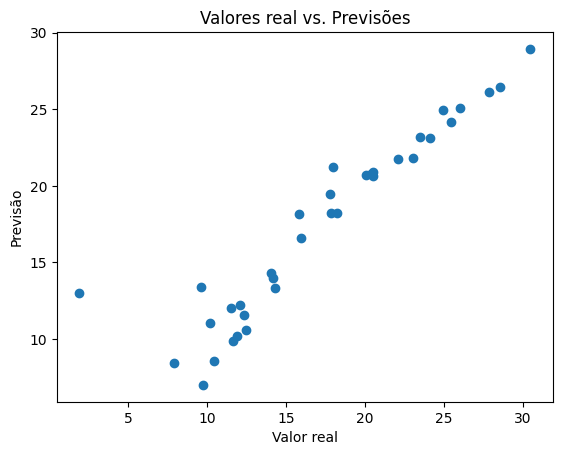

In [49]:
plt.scatter(y_test, predictions)
plt.xlabel('Valor real')
plt.ylabel('Previsão')
plt.title('Valores real vs. Previsões')
plt.show()

In [37]:
investimento_alto = pd.DataFrame({
    'youtube': [230.0],
    'facebook':[43.0],
    'newspaper':[50.0]
})
investimento_baixo = pd.DataFrame({
    'youtube': [23.0],
    'facebook':[4.3],
    'newspaper':[5.0]
})

In [51]:
previsao_vendas1 = modelo.predict(investimento_alto)
previsao_vendas2 = modelo.predict(investimento_baixo)

print(f'Previsão de investimentos altos: {previsao_vendas1[0]:.2f} e Previsão de investimentos baixos: {previsao_vendas2[0]:.2f}')
# Como podemos ver, eu diminui uma casa decimal nos investimentos e é possível analisar que quanto menor o investimento nas plataformas melhor o retorno em vendas

Previsão de investimentos altos: 22.2 e Previsão de investimentos baixos: 5.56
